In [6]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
file=pd.read_csv('/Users/sultansadiqhusainsiddiqui/Downloads/cleaned_star_data.csv')
file

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [10]:
file.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [13]:
# seeing some random values just to see the data set better,and the values better  by selecting 10 random  values
file.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
225,18734,224780.00000,46.0000,-7.45,4,Blue,O
220,23678,244290.00000,35.0000,-6.27,4,Blue,O
86,12010,0.00078,0.0092,12.13,2,Blue-White,B
213,22012,6748.00000,6.6400,-2.55,3,Blue-White,B
85,9675,0.00045,0.0109,13.98,2,Blue-White,A
162,12675,452000.00000,83.0000,-5.62,4,Blue,O
150,29560,188000.00000,6.0200,-4.01,3,Blue-White,B
121,3531,0.00093,0.0976,19.94,0,Red,M
58,3752,209000.00000,955.0000,-11.24,5,Red,M
5,2840,0.00065,0.1100,16.98,0,Red,M


In [14]:
# lets check if there are any null values, or if there are any data missing, using the Non-Null Count of python.
# we also want to see the data types of each column, incase we need to convert something.
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [16]:
# creating a directory to save some of our visaulizations:
folder_name='star_plots'
os.makedirs(folder_name,exist_ok=True)
baseDir='/Users/sultansadiqhusainsiddiqui/Desktop/CodingProjects/Star_visualizations/'

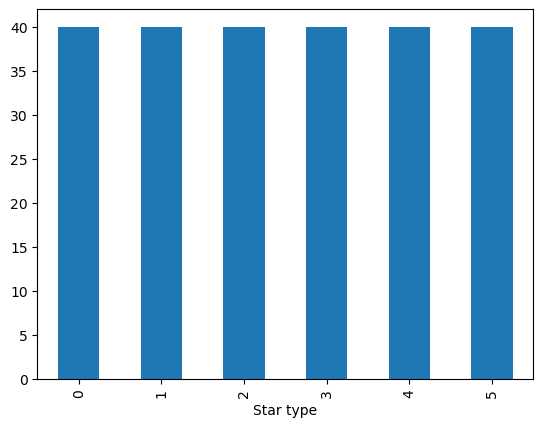

In [25]:
#lets star by visualizing the count of stars(quantity) for each type of star, using pandas and matplotlib
file['Star type'].value_counts().plot(kind='bar')
plt.show()


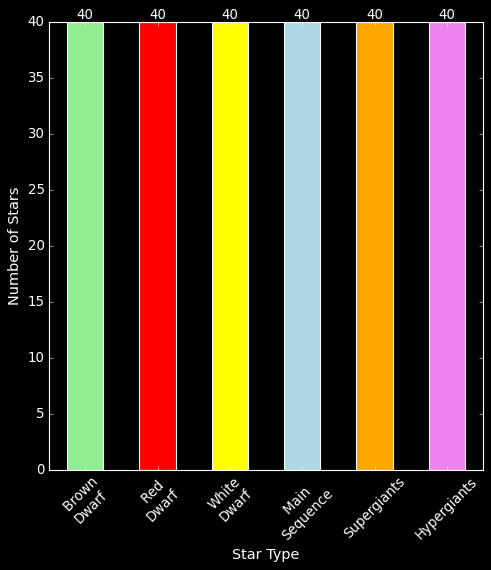

In [103]:
# Customizing the graph a little:
plt.figure(figsize=(7,7))
plt.style.use('dark_background')
ax=file['Star type'].value_counts().plot(kind='bar',color=['lightgreen','red','yellow','lightblue','orange','violet'])
ax.bar_label(ax.containers[0],color='white')
plt.ylabel('Number of Stars',color='white',fontsize=13)
plt.xlabel('Star Type',color='white',fontsize=13)
plt.yticks(color='white')
plt.xticks(ticks=[0,1,2,3,4,5],
           labels=[' Brown\nDwarf',' Red\nDwarf','White\nDwarf',' Main\nSequence','Supergiants','Hypergiants'],
            rotation=45
          )
plt.show()


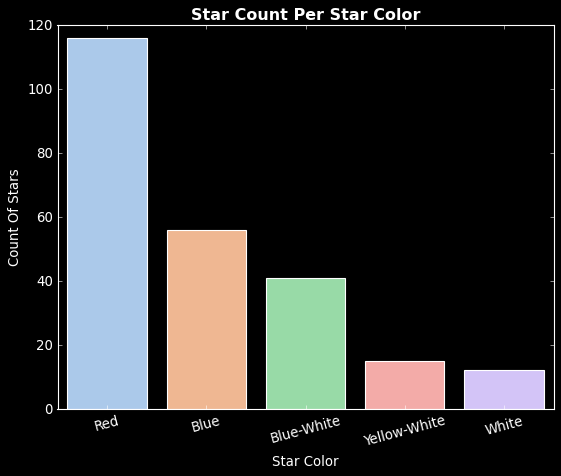

In [115]:
# we want to see the  star count for each color, using seaborn and matplotlib:
sns.barplot(x=file['Star color'].value_counts().index,
            y=file['Star color'].value_counts(),
            palette='pastel'
        )
plt.xticks(rotation=15, color='white')
plt.xlabel('Star Color')
plt.ylabel('Count Of Stars')
plt.title('Star Count Per Star Color',fontweight='bold')
plt.show()

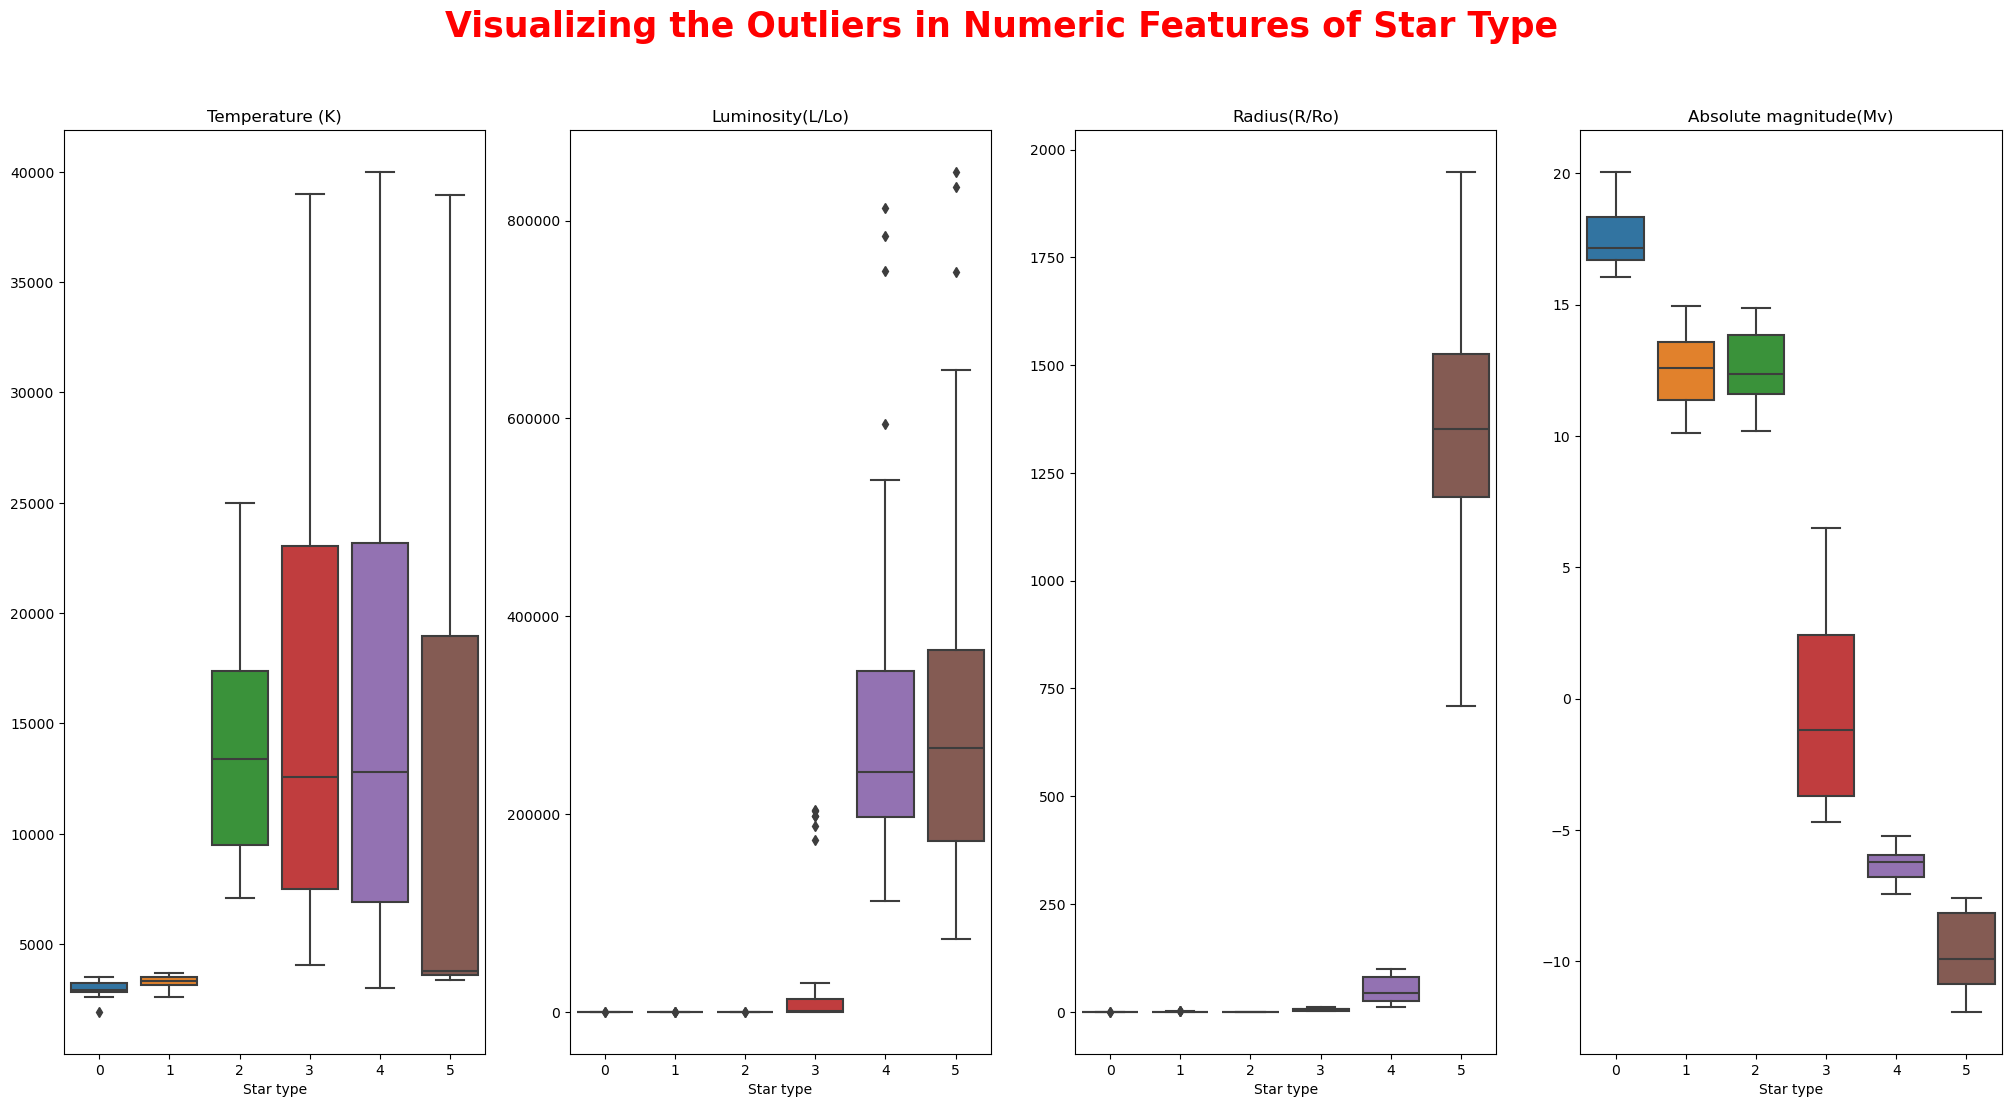

In [132]:
# lets visualize some of our outliers in ourf numerical values with respect to star type using Box Plots and Sub Plots:
plt.style.use('default')
plt.figure(figsize=(25,12))
plt.suptitle('Visualizing the Outliers in Numeric Features of Star Type',color='red',weight="bold",fontsize=25)

for i in range(4):
    plt.subplot(1,4,i+1)
    sns.boxplot(x=file['Star type'],y=file.iloc[:,i])
    plt.title(file.columns[i], color='black')
    plt.ylabel('')




As we know, the diamond hints the presense of a outlier. If we are doing a machine learning model training, we can go ahead and remove these outliers, but since we are only trying to understand the dataset they can stay for now.

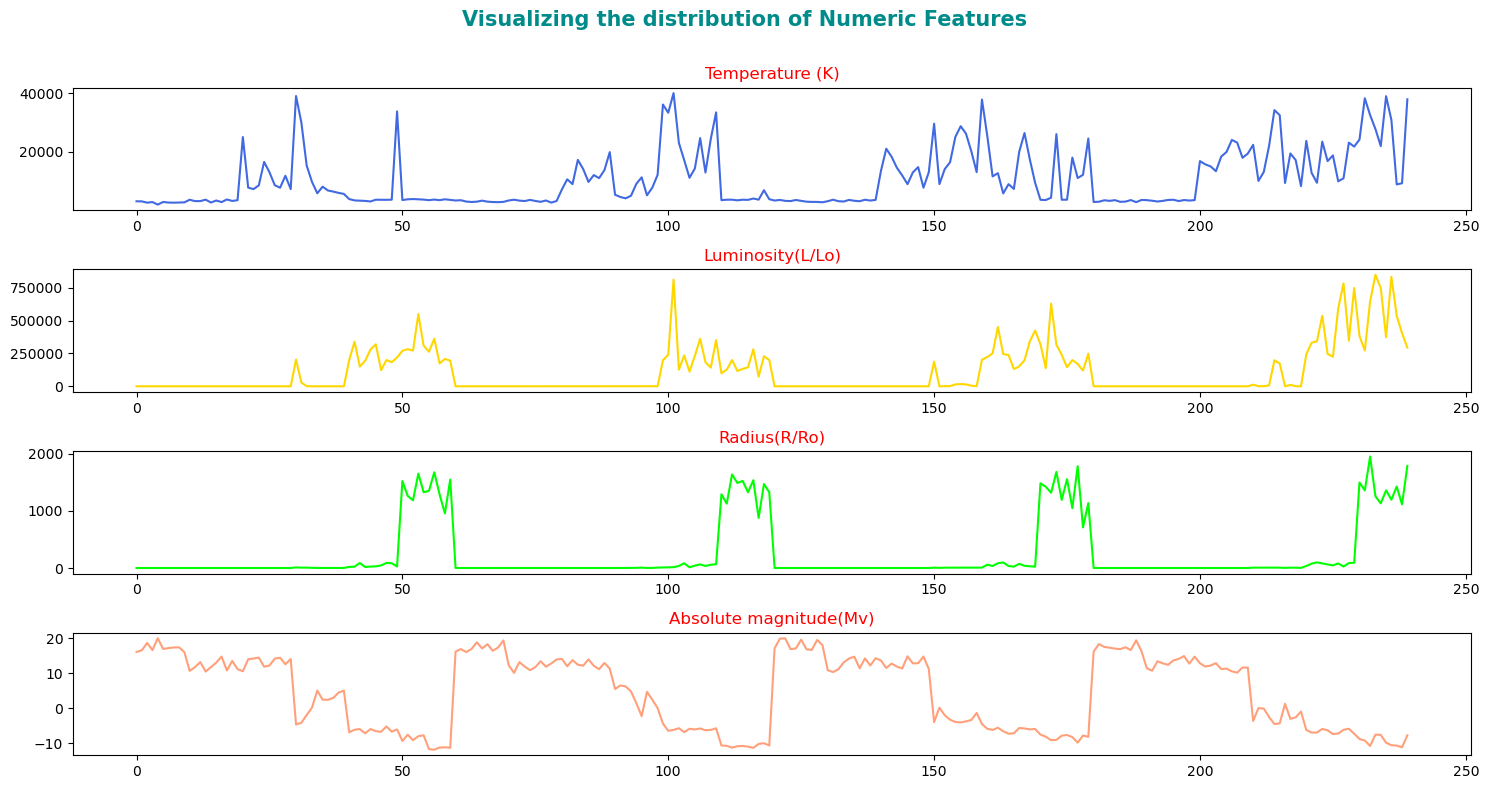

In [148]:
#creating some line plots for numeric values in our dataset, to see if there is some intercorrespondecne and pattern:
colors=['royalblue','gold','lime','lightsalmon']
plt.figure(figsize=(15,8))
plt.suptitle('Visualizing the distribution of Numeric Features\n',fontsize=15,weight="bold",color='darkcyan')

for i in range(4):
    plt.subplot(4,1,i+1)
    # in this case, we want  4 diffrent rows in one column
    plt.plot(file.iloc[:,i],color=colors[i])
    plt.title(file.columns[i],color='red')
    
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

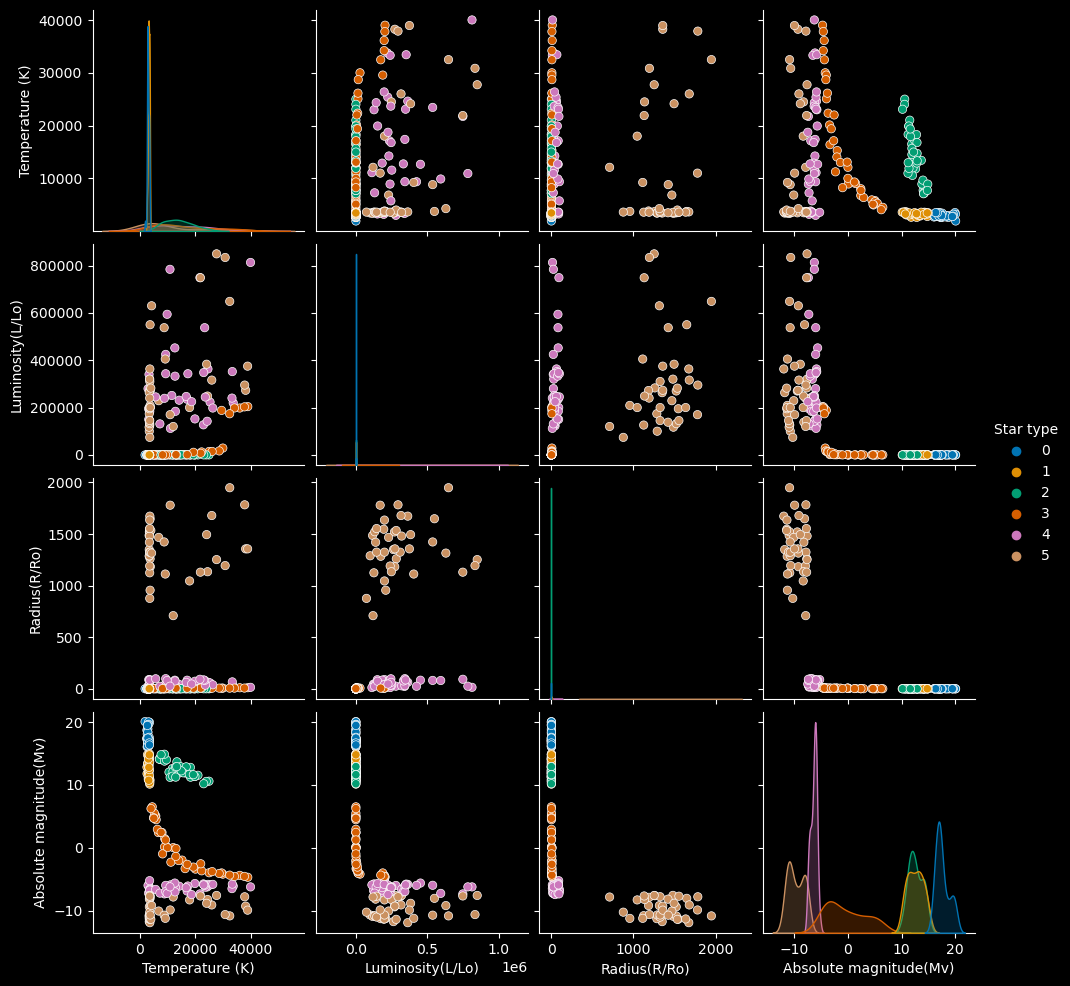

In [155]:
#Creating a pair-plot to see what relationship there are within the data and the diffrent fields:
# since we dont have a lot of columns we can use seaborn, as it hoepfully wont take a lot of time:
plt.style.use('dark_background')
sns.pairplot(file,hue='Star type',palette='colorblind')
plt.show()

This is a very powerful plot, as we can find a lot of interesting inforamtion, for example, when the Absolute magnitude increase, temperature falls.

# Creating An HR Diagram:
An HR diagram, also known as a Hertzsprung-Russell diagram, is a scatter plot of stars showing the relationship between the stars’ 
absolute magnitudes or luminosities and their stellar classifications or effective temperatures. It is a fundamental tool in astronomy, 
used to understand the life cycle of stars and their evolutionary stages.

Since our DataSet is about stars and we have all the necessary data that is needed to plot a HR plot, it only makes sense to go ahead and create one, especailly for out astronomy lovers.


In [166]:
star_type=file['Star type'].values
temp=file['Temperature (K)'].values
absMag=file['Absolute magnitude(Mv)'].values

starTypes={
    0:{'label':'Brown Dwarf','color':'brown','size':30,'marker':'.'},
    1:{'label':'Red Dwarf','color':'red','size':35,'marker':'.'},
    2:{'label':'White Dwarf','color':'white','size':40,'marker':'.'},
    3:{'label':'Main Sequence','color':'cyan','size':30,'marker':'o'},
    4:{'label':'Supergiants','color':'orange','size':100,'marker':'o'},
    5:{'label':'Hypergiants','color':'maroon','size':150,'marker':'o'},
    
}

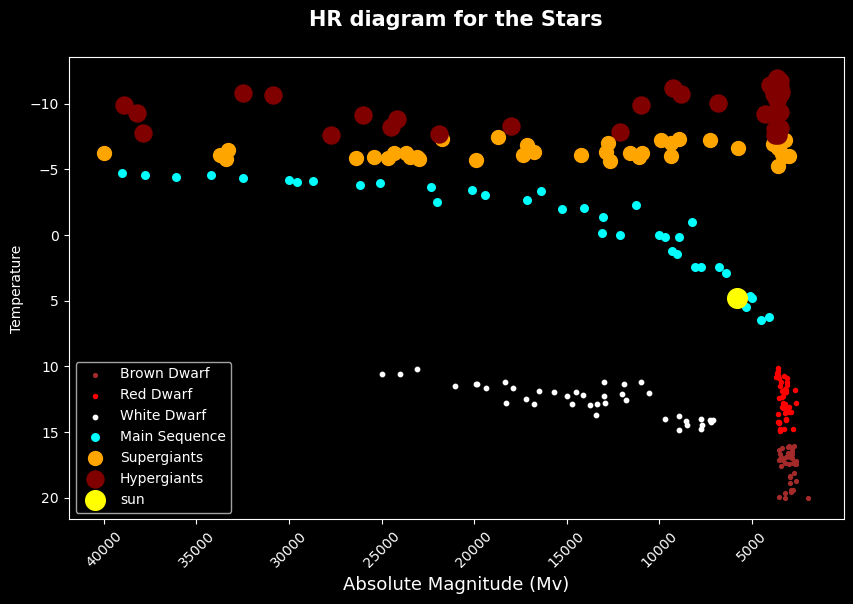

In [191]:
# plotting a HR diagram for temp vs Abs mag:
axes=[]
labels = set()
# we use sets, because it doesnt allow duplicate values.

plt.figure(figsize=(10,6))
for i in range(len(star_type)):
    properties=starTypes[star_type[i]]
    if properties['label'] not in labels:
        ax = plt.scatter(temp[i],absMag[i],
                   s=properties['size'],
                   c=properties['color'],
                   marker=properties['marker'],
                   label=properties['label'])
        axes.append(ax)
        labels.add(properties['label'])
    else:
        plt.scatter(temp[i],absMag[i],
                   s=properties['size'],
                   c=properties['color'],
                   marker=properties['marker'],
                   label=properties['label'])

# adding data for our sun, for comaprison:
plotSun=plt.scatter(5778,4.83,s=200,c='yellow',marker='o',label='sun')
axes.append(plotSun)
labels.add('Sun')
    
plt.legend(handles=axes)
# inverting our axis using gca(get current axis)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.title('HR diagram for the Stars\n',fontsize=15,weight="bold",color="white")
plt.xlabel('Absolute Magnitude (Mv)', fontsize=13, color='white')
plt.xticks(rotation=45)
plt.ylabel('Temperature',fontsize=10,color='white')
plt.show()


